In [ ]:
import numpy as np
import pandas as pd

In [ ]:
sentiment_data=pd.read_csv('/content/sentiment_analysis.csv')

In [ ]:
sentiment_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#data Pre-processing

In [ ]:
sentiment_data.shape

(7920, 3)

In [ ]:
sentiment_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [ ]:
sentiment_data.duplicated().sum()

0

#check if this data set has null values

In [ ]:
sentiment_data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [ ]:
sentiment_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#Text Pre processing
1.convert upper to lowercase
2.remove links
3.remove pantuations
4.remove numbers
5.remove stopwords(and,or,then etc)
6.stemming




In [ ]:
import re
import string

In [ ]:
sentiment_data["tweet"]= sentiment_data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [ ]:
sentiment_data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [ ]:
sentiment_data["tweet"] = sentiment_data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [ ]:
sentiment_data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove pantuations('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')


In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

sentiment_data["tweet"] = sentiment_data["tweet"].apply(remove_punctuations)

In [ ]:
sentiment_data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [ ]:
sentiment_data["tweet"] = sentiment_data['tweet'].str.replace('\d+', '', regex=True)

In [ ]:
sentiment_data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [ ]:
sentiment_data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
sentiment_data["tweet"] = sentiment_data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
sentiment_data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
sentiment_data["tweet"] = sentiment_data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [ ]:
sentiment_data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Building Vacabulary


In [ ]:
from collections import Counter
vocab = Counter()

In [ ]:
vocab

Counter()

In [ ]:
for sentence in sentiment_data['tweet']:
    vocab.update(sentence.split())

In [ ]:
len(vocab)

15949

In [ ]:
sentiment_data.shape

(7920, 3)

In [ ]:
tokens = [key for key in vocab if vocab[key] > 10]

In [ ]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [ ]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Divide dataset

In [ ]:
X = sentiment_data['tweet']
y = sentiment_data['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

5258    oh sunni day metromanb weekday selfi friend fo...
4354    facial recognit wireless charg iphon x ae clut...
7867               news ipod develop yet anoth fault ipoo
4157    last day vote dabbal round art game app iphon ...
2275    loung almost complet grey teal ikea df soni ha...
                              ...                        
4569    welcom life new babi newphon smartphon galaxi ...
535     smile smile girl vacat bokeh soni color vsco l...
4647    rt freetraininonli appl android that like say ...
1483    middl hate relationship love iphon hate attservic
4077    overpr crap bluetooth airplay well cours yet a...
Name: tweet, Length: 6336, dtype: object

In [ ]:
X_test

4257    fuckyou appl ill buy anoth though lightningc f...
3316    way happi azerbaijan baku shahdag gabala uae a...
2443    photo vega food foodnetwork appl instagram lik...
705     think she tri figur what special social networ...
5600    lunch go vegan lunch plantbas fruit hydrat app...
                              ...                        
47       ahhhh look got christma iphon appl christma girl
4159    bright makeup brighten cloudi dayyy instap smi...
5647                theyr tri make pay new iphon fuckthat
5896                  hate ipod reset second time product
1137    day christma samsung live laugh life instamood...
Name: tweet, Length: 1584, dtype: object

In [ ]:
y_train

5258    0
4354    0
7867    1
4157    0
2275    0
       ..
4569    0
535     0
4647    0
1483    1
4077    1
Name: label, Length: 6336, dtype: int64

Vectorization

In [ ]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [ ]:
vectorized_x_train = vectorizer(X_train, tokens)

In [ ]:
vectorized_x_test = vectorizer(X_test, tokens)

In [ ]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

5258    0
4354    0
7867    1
4157    0
2275    0
       ..
4569    0
535     0
4647    0
1483    1
4077    1
Name: label, Length: 6336, dtype: int64

In [ ]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

4257    1
3316    0
2443    0
705     0
5600    0
       ..
47      0
4159    0
5647    1
5896    0
1137    0
Name: label, Length: 1584, dtype: int64

In [ ]:
y_train.value_counts()

0    4721
1    1615
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

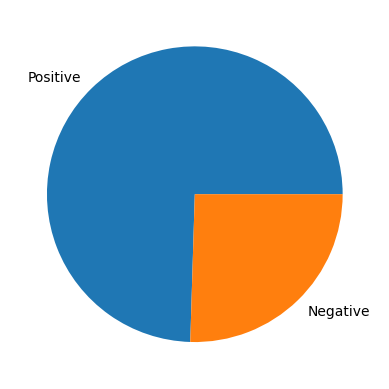

In [ ]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Handle imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9442, 1145) (9442,)


In [ ]:
y_train_smote.value_counts()

0    4721
1    4721
Name: label, dtype: int64

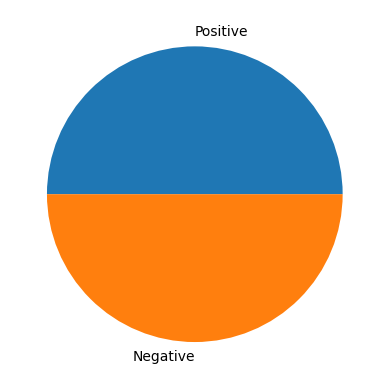

In [ ]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [ ]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03915912, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9437    1
9438    1
9439    1
9440    1
9441    1
Name: label, Length: 9442, dtype: int64

In [ ]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

4257    1
3316    0
2443    0
705     0
5600    0
       ..
47      0
4159    0
5647    1
5896    0
1137    0
Name: label, Length: 1584, dtype: int64

Model training and evaluations

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

logistic regression

In [ ]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.917
	Recall = 0.969
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.877
	Precision = 0.726
	Recall = 0.844
	F1-Score = 0.781


Naive Bayer

In [ ]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.87
	Recall = 0.957
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.866
	Precision = 0.682
	Recall = 0.908
	F1-Score = 0.779


Decision tree

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.826
	Precision = 0.663
	Recall = 0.669
	F1-Score = 0.666


Random forest

In [ ]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.78
	Recall = 0.689
	F1-Score = 0.731


Support Vector Machine

In [ ]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.965
	Recall = 0.996
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.888
	Precision = 0.776
	Recall = 0.8
	F1-Score = 0.788


In [ ]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)

Predction pipeline

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import pickle

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
with open('../static/model/model.pickle', 'rb') as f:
    model = pickle.load(f)

In [ ]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
vocab = pd.read_csv('../static/model/vocabulary.txt', header=None)
tokens = vocab[0].tolist()

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
def preprocessing(text):
    data = pd.DataFrame([text], columns=['tweet'])
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["tweet"] = data["tweet"].apply(remove_punctuations)
    data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
    return data["tweet"]

In [ ]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [ ]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)
    if prediction == 1:
        return 'negative'
    else:
        return 'positive'

Test the predictions.Eg- provide positive and negative comment and check if the model identified them as positive feedback or negative feedback

In [ ]:
txt = "awesome product. i love it"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'positive'

In [ ]:
txt = "this product does not meet my expectations"
preprocessed_txt = preprocessing(txt)
vectorized_txt = vectorizer(preprocessed_txt, tokens)
prediction = get_prediction(vectorized_txt)
prediction

'negative'